<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Flight Number                     200000 non-null  object        
 1   Scheduled Departure Time          200000 non-null  datetime64[ns]
 2   Actual Departure Time             200000 non-null  datetime64[ns]
 3   Delay (Minutes)                   200000 non-null  int64         
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64       
 5   Turnaround Time (Minutes)         200000 non-null  int64         
 6   Load Factor (%)                   200000 non-null  float64       
 7   Fleet Availability (%)            200000 non-null  float64       
 8   Maintenance Downtime (Hours)      200000 non-null  float64       
 9   Fuel Efficiency (ASK)             200000 non-null  float64       
 10  Revenue (USD)                   

<Figure size 1500x1000 with 0 Axes>

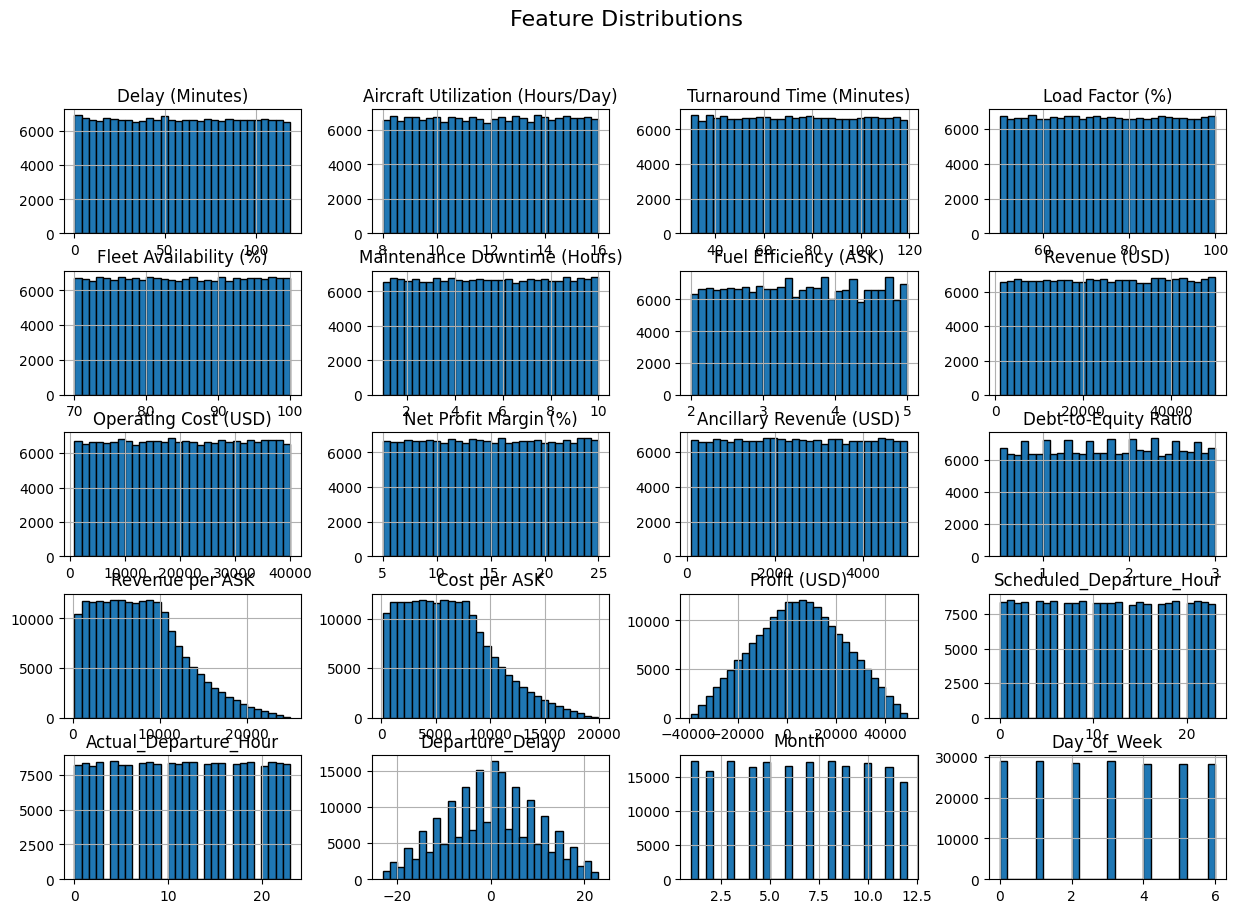

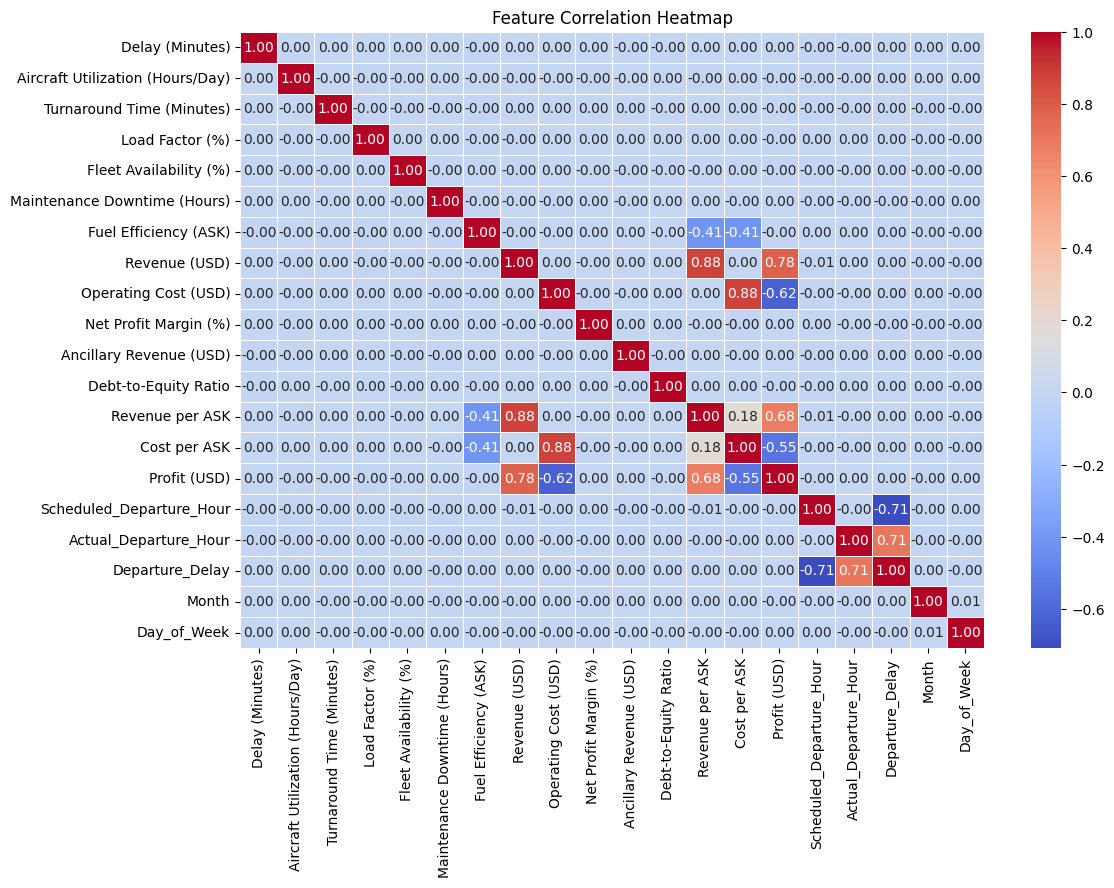

Random Forest Model Performance:
MAE: 41.26, MSE: 2856.72, RMSE: 53.45, R²: 0.99999
Cross-Validation R² Scores: [0.9999884  0.99998803 0.99998869 0.99998857 0.99998926]
Mean CV R² Score: 0.9999885884881605


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = r"D:\HACKLTON MASAI\aviation_data.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Display basic information
df.info()
print(df.head())

# Check for missing values and duplicates
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())

# Fill missing values (categorical: mode, numerical: median)
for col in df.columns:
    if df[col].dtype == 'object':
        df.loc[:, col] = df[col].fillna(df[col].mode()[0])
    else:
        df.loc[:, col] = df[col].fillna(df[col].median())

# Convert time-related features into numeric values
if 'Scheduled Departure Time' in df.columns and 'Actual Departure Time' in df.columns:
    df['Scheduled_Departure_Hour'] = pd.to_datetime(df['Scheduled Departure Time']).dt.hour
    df['Actual_Departure_Hour'] = pd.to_datetime(df['Actual Departure Time']).dt.hour
    df['Departure_Delay'] = df['Actual_Departure_Hour'] - df['Scheduled_Departure_Hour']
    df['Month'] = pd.to_datetime(df['Scheduled Departure Time']).dt.month
    df['Day_of_Week'] = pd.to_datetime(df['Scheduled Departure Time']).dt.dayofweek
    df.drop(['Scheduled Departure Time', 'Actual Departure Time'], axis=1, inplace=True)

# Summary statistics
print(df.describe())

# Visualizing distributions
plt.figure(figsize=(15, 10))
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Define target variable
y = df["Profit (USD)"]
df.drop(columns=["Profit (USD)"], inplace=True)

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df.loc[:, col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Standardizing numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Model (without hyperparameter tuning)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Model Performance:")
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.5f}")

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Mean CV R² Score:", np.mean(cv_scores))


In [4]:
import joblib

# Save the trained model
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")


['label_encoders.pkl']